In [2]:
from dynamodelx import UFA
from sklearn.datasets import fetch_california_housing
from dynamodelx.plots import draw_plots

In [3]:
data = fetch_california_housing()
X, y = data.data, data.target

ufa = UFA(
    task='regression', 
    model_size='small', 
    input_dim=X.shape[1],
    output_dim=1,
    loss='mean_square_loss',
    device='cuda',
    custom_architecture=None, 
    weights_init='he', 
    hidden_activation='relu',
    optimizer='adam',
    return_metrics=True,
    auto_build=True,
    multiclass=False,
    uncertainty=False
)

performance = ufa.train(
                    X=X,
                    y=y,
                    epochs=50,
                    learning_rate=0.01,
                    momentum=None,
                    val_size=0.2,
                    test_size=0.1,
                    batch_size=32
                )


Model Configuration:

  Task:               regression
  Model Size:         small
  Input Dimension:    8
  Output Dimension:   1
  Loss                mean_square_loss
  Device:             cuda
  Hidden Activation:  relu
  Optimizer:          adam
  Weights Init:       he
  Uncertainty:        False
  Multiclass:         False
  Custom Architecture:None

Building the model ...

===== Built Model =====
Linear(in_features=8, out_features=64, bias=True)
ReLU()
Linear(in_features=64, out_features=32, bias=True)
ReLU()
Linear(in_features=32, out_features=1, bias=True)

Total parameters: 2,689
Trainable parameters: 2,689
Non-trainable parameters: 0

Model successfully built

Average train loss per sample : 0.2609989529894304 
Average validation loss per sample : 0.2710811445532843

Average test loss per sample: 0.2617051201735356


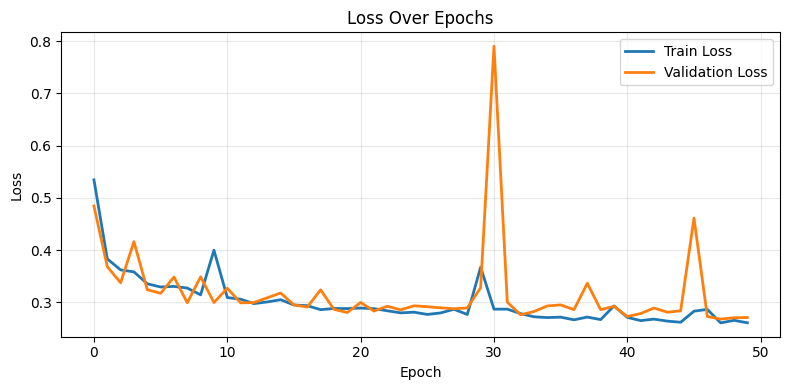

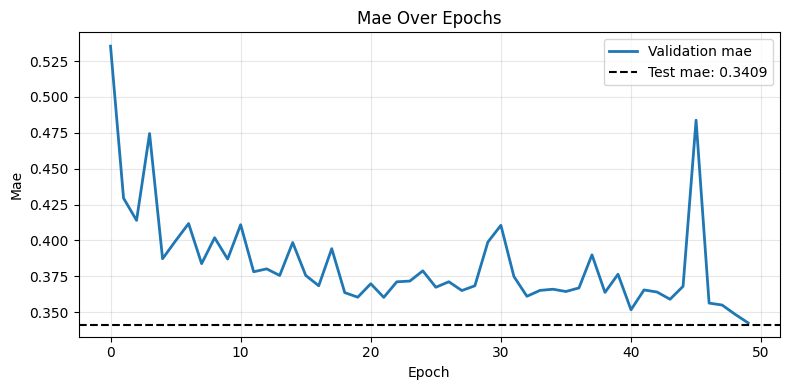

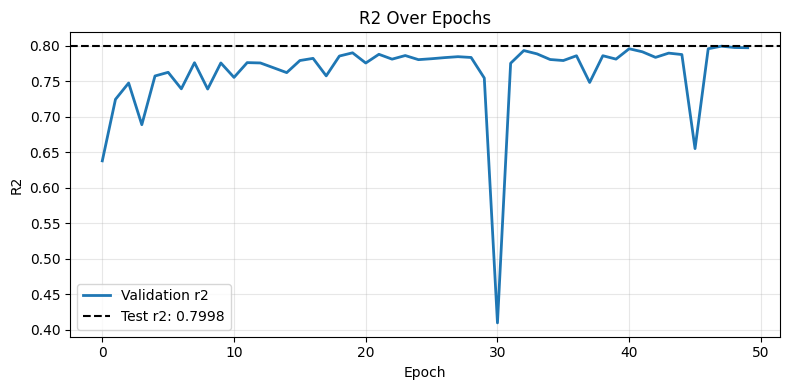

In [4]:
draw_plots(performance=performance)

In [5]:
performance.test

{'test_mae': 0.3408929109573364, 'test_r2': 0.7997902035713196}

In [6]:
predictions = ufa.predict(X[:5])
print(predictions)

[3.8082676 4.3817434 4.103603  2.5242677 2.4043698]


In [7]:
ufa.save(path='california_housing.pth')

Model successfully saved to: california_housing.pth
